# Resume Screening App

In [4]:
# Import the necessary libraries first

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [7]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## Data Exploration

In [8]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

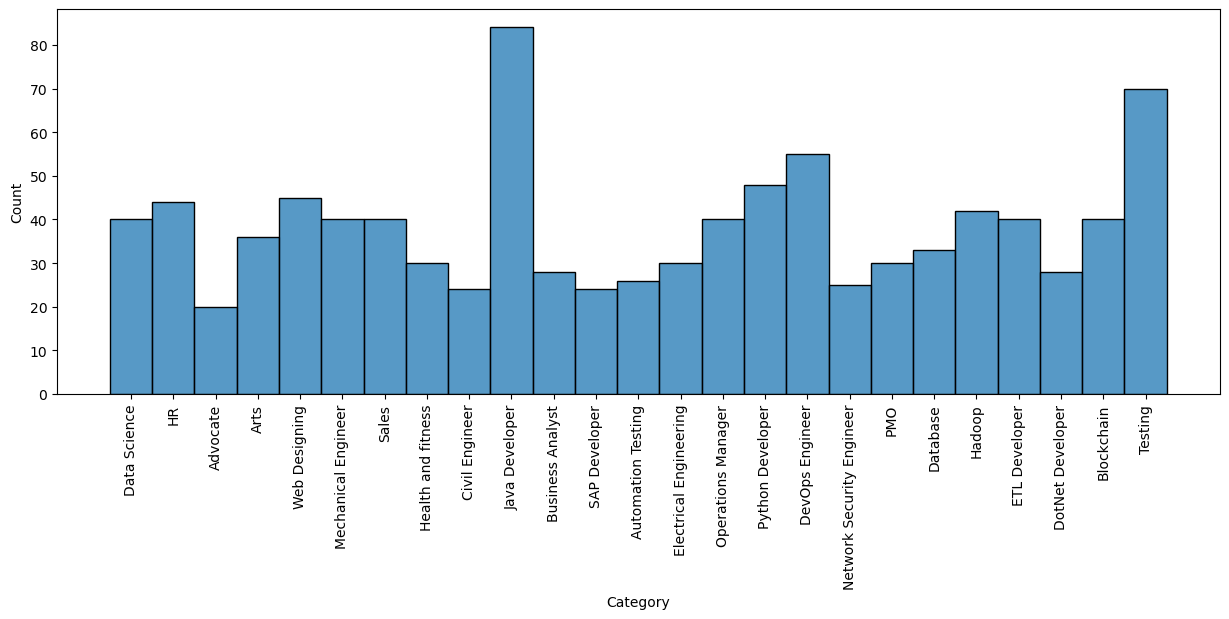

In [15]:
plt.figure(figsize=(15,5))
sns.histplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

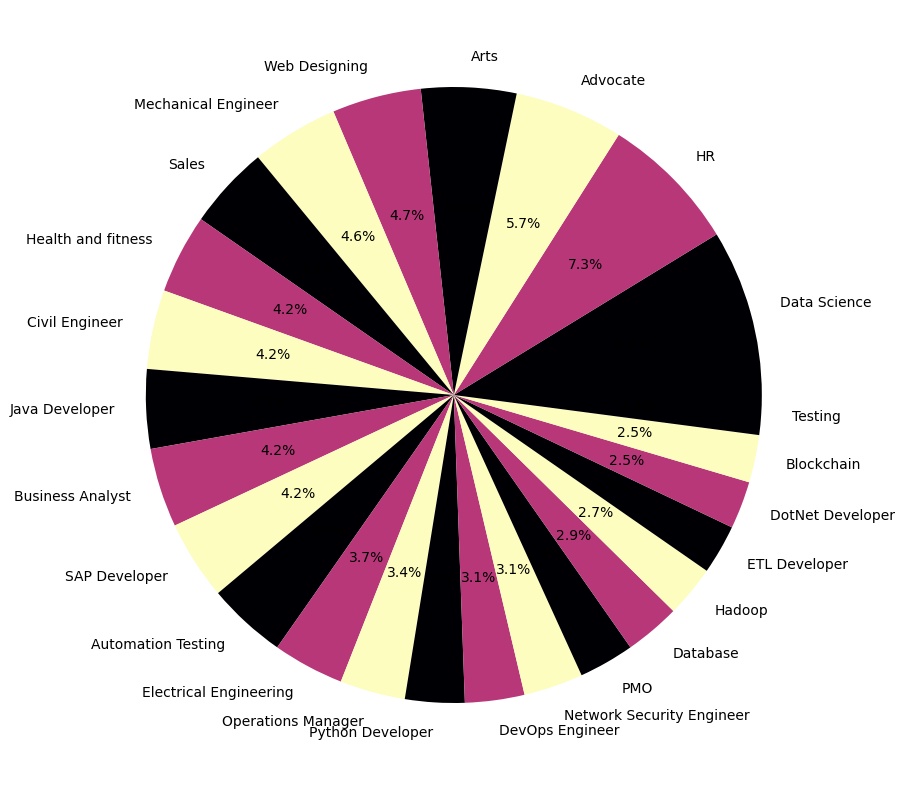

In [21]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=False,colors=plt.cm.magma(np.linspace(0,1,3)))
plt.show()

In [22]:
df['Category'][0]

'Data Science'

In [23]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Data Cleaning 

In [69]:
import re
def cleanResume(txt):
    cleanText = re.sub(r'http\S+\s', ' ', txt)
    cleanText = re.sub(r'RT|cc', ' ', cleanText)
    cleanText = re.sub(r'#\S+\s', ' ', cleanText)
    cleanText = re.sub(r'@\S+', '  ', cleanText)  
    cleanText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub(r'\s+', ' ', cleanText)
    return cleanText

<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:7: SyntaxWarning: invalid escape sequence '\]'
C:\Users\Msi\AppData\Local\Temp\ipykernel_25584\2109758009.py:7: SyntaxWarning: invalid escape sequence '\]'
  cleanText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)


In [71]:
df['Resume'] = df['Resume'].apply(lambda x : cleanResume(x))

In [74]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

## Vectorization

In [79]:
from sklearn.preprocessing import LabelEncoder #used to encode target labels with value between 0 and n-1
le = LabelEncoder()

In [80]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [81]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [83]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23], dtype=int64)

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

## Creating and Training Model

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split( requiredText, df['Category'], test_size=0.2, random_state=42)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier ## for multiple target classes
from sklearn.metrics import accuracy_score

In [110]:
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

Text(0.5, 1.0, 'Error Rate vs K Value')

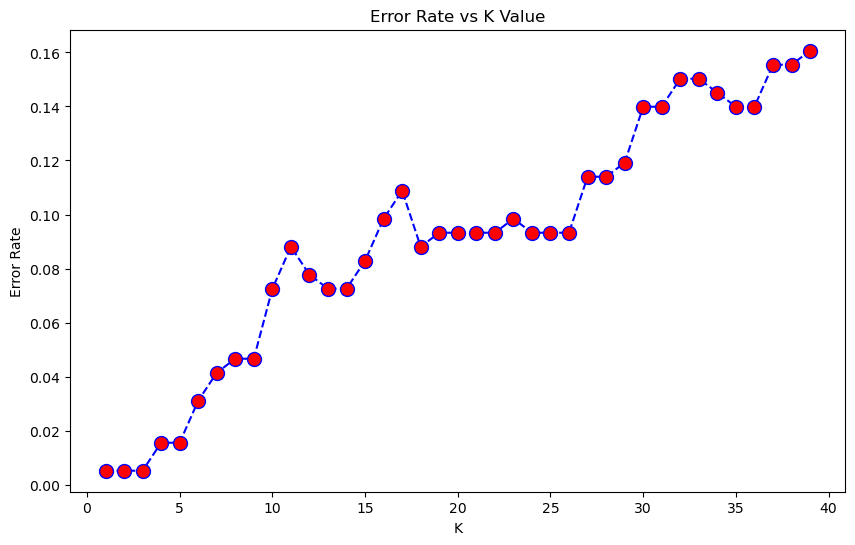

In [112]:
error_rate = []

for i in range (1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K Value')

## Find Accuracy of Model

In [113]:
print("Model accuracy is: " ,accuracy_score(y_test,pred)*100, "%")

Model accuracy is:  99.48186528497409 %


## Import model for future use

In [114]:
import pickle

In [115]:
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(knn,open('knn.pkl','wb'))

In [116]:
myresume= """UDAYAN SINGH
+91-9131446521 | email4udayan@gmail.com | LinkedIn | GitHub | LeetCode
EDUCATION
B.Tech, Mathematics and Computing Graduating May 2024
Madhav Institute of Technology and Science, 8.72 CGPA
Gwalior, MP
Relevant coursework: Data Structures and Algorithms, Design and Analysis of Algorithms, Database Management
System, Cloud Computing, Operating Systems, Computer Networks.
WORK EXPERIENCE
Praedico Global Research Pvt. Ltd., Gwalior, MP: Web Developer Intern May 2023 – June 2023
• CRUD API: Developed an API performing CRUD operations using Express.js, MongoDB and Node.js, specifying
access to the website based on the role of an employee.
• React.js: Orchestrated migration from PHP to React.js, resulting in an improvement in website loading time.
• Authentication and Security: Implemented Nodemailer OTP package to provide added security before registering
a new user. implemented JWT for streamlined and secure user registration.
• Axios: Developed login/signup, product management, and cart functionalities using React.js and Axios Library
to create dynamic pages that fetch data from the company’s server.
PERSONAL PROJECTS
Real Estate Price Predictor GitHub
Real Estate Price Prediction is a machine learning model to predict real estate prices in Bangalore.
• Linear Regression: Employed Linear Regression for price prediction and achieved an accuracy score of 0.85 on
the test set and an average cross-validation score of 0.82
• Python Libraries: Utilized Python libraries like Pandas, NumPy, and Matplotlib to handle and visualize data.
• Data Cleaning: Processed and cleaned a dataset containing over 13320 property listings in Bengaluru, reducing
it to 7251 high quality data points for analysis
Twitter Sentiment Analysis GitHub
Developed a Twitter Sentiment Analysis bot utilizing Logistic Regression on Google Colab. Engineered to predict user
sentiment based on their tweets, achieving a commendable 77 percent accuracy on test data.
• Natural Language Processing Pipeline: Implemented a robust pipeline leveraging regular expressions, NLTK for
stopword removal and stemming, and scikit-learn’s TfidfVectorizer and Logistic Regression for feature extraction
and sentiment classification.
• Data Cleaning: Applied Pandas and NumPy for streamlined data cleaning in the project. Leveraged Pandas for
data manipulation and handling, while NumPy facilitated efficient numerical operations.
Contact-API Code
The Contact-API project is a robust contact management API built with Node.js , Express.js, and MongoDB. It includes
user authentication, CRUD operations, search functionality, and error handling.
• CRUD Operations: The API empowers users to perform Create, Read, Update, and Delete operations on contact
records, facilitating seamless management of contact information.
• Error Handling: Significantly reduced troubleshooting time through effective error handling, leading to an effective
understanding of underlying error and solving it efficiently.
• Token-Based Authentication: Secure API endpoints are implemented using JSON Web Tokens (JWT), ensuring
the security of sensitive operations and protecting against unauthorized access.
TECHNICAL SKILLS
Programming: Java, Javascript, Python
Technologies/Frameworks: Node.js, Express.js, React.js , Numpy , MongoDB , Git, Pandas , Matplotlib , Scikitlearn
Developer Tools: GitHub, VS Code , Postman, MS Excel , Jupyter , Google Colab
Other Skills: HTML, CSS, Data Structures and Algorithms, Problem Solving
Certifications: Cloud Computing"""

In [117]:
import pickle

clf =pickle.load(open('knn.pkl','rb'))

cleaned_resume = cleanResume(myresume)
cleaned_resume

'UDAYAN SINGH 91 9131446521 email4udayan LinkedIn GitHub LeetCode EDUCATION B Tech Mathematics and Computing Graduating May 2024 Madhav Institute of Technology and Science 8 72 CGPA Gwalior MP Relevant coursework Data Structures and Algorithms Design and Analysis of Algorithms Database Management System Cloud Computing Operating Systems Computer Networks WORK EXPERIENCE Praedico Global Research Pvt Ltd Gwalior MP Web Developer Intern May 2023 June 2023 CRUD API Developed an API performing CRUD operations using Express js MongoDB and Node js specifying a ess to the website based on the role of an employee React js Orchestrated migration from PHP to React js resulting in an improvement in website loading time Authentication and Security Implemented Nodemailer OTP package to provide added security before registering a new user implemented JWT for streamlined and secure user registration Axios Developed login signup product management and cart functionalities using React js and Axios Libra

In [118]:
input_features = tfidf.transform([cleaned_resume])

prediction_id = clf.predict(input_features)[0]

category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6
